In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x * 2 + np.random.normal(0, 1, size=100)

In [59]:
# 欠拟合（二次方程生成的点，用线性模型拟合）
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.8508226688958006

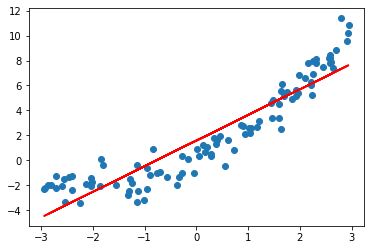

In [60]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='red')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

2.3512608070767236

# 使用多项式回归

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [87]:
lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [88]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [89]:
y_predict = poly2_reg.predict(X)
mean_squared_error(y, y_predict)

0.7128474592876622

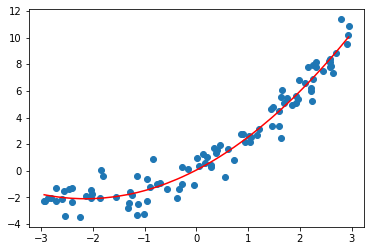

In [90]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [67]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y_predict10 = poly10.predict(X)
mean_squared_error(y, y_predict10)

1.0464049725219144

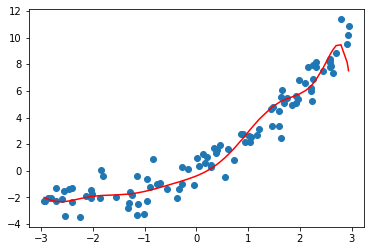

In [68]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict10[np.argsort(x)], color='r')
plt.show()

In [91]:
# 过拟合：用多项式（100项）线性回归拟合二次曲线
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y_predict100 = poly10.predict(X)
mean_squared_error(y, y_predict100)

1.0464049725219144

In [95]:
poly100_reg.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

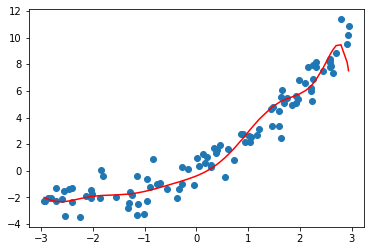

In [92]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict100[np.argsort(x)], color='r')
plt.show()

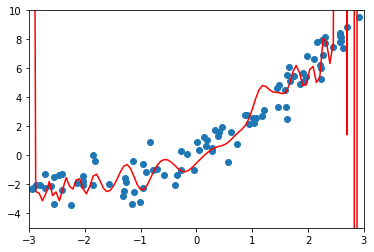

In [71]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -5, 10])
plt.show()

# train test split的意义

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [84]:
# 欠拟合
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict_train = lin_reg.predict(X_train)
print("train_score: ", mean_squared_error(y_train, y_predict_train))
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

train_score:  2.5855326903211884


1.6849901236228766

In [85]:
# proper
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y_predict2_train = poly2_reg.predict(X_train)
print("train_score: ", mean_squared_error(y_train, y_predict2_train))
y_predict2 = poly2_reg.predict(X_test)
mean_squared_error(y_test, y_predict2)

train_score:  0.7028451963323983


0.7608992775349364

In [86]:
# proper
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y_predict10_train = poly10_reg.predict(X_train)
print("train_score: ", mean_squared_error(y_train, y_predict10_train))
y_predict10 = poly10_reg.predict(X_test)
mean_squared_error(y_test, y_predict10)

train_score:  0.6180486704644336


0.8814161606634515

In [83]:
# 过拟合
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y_predict100_train = poly100_reg.predict(X_train)
print("train_score: ", mean_squared_error(y_train, y_predict100_train))
y_predict100 = poly100_reg.predict(X_test)
print("test_score: ", mean_squared_error(y_test, y_predict100))

train_score:  0.2826017504383613
test_score:  21152195588627.816
